<a href="https://colab.research.google.com/github/ehpub/kfq_ML_2023/blob/main/kfq2023_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%8B%B9%EB%87%A8%EB%B3%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
path = '/content/drive/MyDrive/mldata/diabetes.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(path)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
data = df.drop('Outcome',axis=1)
label = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(data,label)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression() #모델 생성
model.fit(x_train,y_train) #모델 학습

In [ ]:
pred = model.predict(x_test)
pp = model.predict_proba(x_test)[:,1]

In [ ]:
sdf = pd.DataFrame()
sdf['pred'] = pred
sdf['pp'] = pp
sdf

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
def get_model_eval(actual,pred):
  con = confusion_matrix(actual,pred)
  acc = accuracy_score(actual,pred)
  pre = precision_score(actual,pred)
  rec = recall_score(actual,pred)
  f1 = f1_score(actual,pred)
  print("오차 행렬\n",con)
  print(f"정확도:{acc:6.4f} 정밀도:{pre:6.4f}")
  print(f"재현율:{rec:6.4f} F1 점수:{f1:6.4f}")

In [ ]:
get_model_eval(y_test,pred)

오차 행렬
 [[106  16]
 [ 28  42]]
정확도:0.7708 정밀도:0.7241
재현율:0.6000 F1 점수:0.6562


In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
prec, rec, thres = precision_recall_curve(y_test,pp)

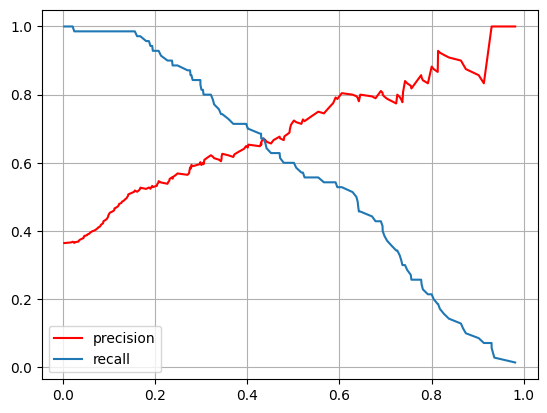

In [ ]:
plt.plot(thres,prec[:-1],'r-',label='precision')
plt.plot(thres,rec[:-1],label='recall')
plt.grid()
plt.legend()
plt.show()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


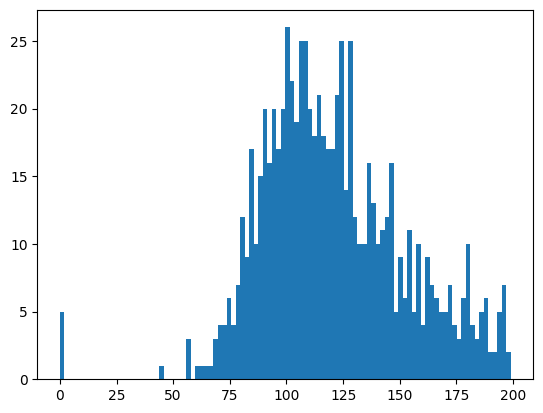

In [ ]:
plt.hist(df['Glucose'],bins=100)
plt.show()

In [ ]:
zero_features = ['Glucose','BloodPressure','SkinThickness',
                 'Insulin','BMI']

In [ ]:
for feature in zero_features:
  zc = df[df[feature]==0][feature].count()
  print(f'{feature} 0의 개수: {zc} 비율:{zc/768:.2f}')

Glucose 0의 개수: 5 비율:0.01
BloodPressure 0의 개수: 35 비율:0.05
SkinThickness 0의 개수: 227 비율:0.30
Insulin 0의 개수: 374 비율:0.49
BMI 0의 개수: 11 비율:0.01


In [ ]:
mf = df[zero_features].mean()
mf

Glucose          120.894531
BloodPressure     69.105469
SkinThickness     20.536458
Insulin           79.799479
BMI               31.992578
dtype: float64

In [ ]:
df[zero_features] = df[zero_features].replace(0,mf)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data = df.drop('Outcome',axis=1)
label = df['Outcome']

ss = StandardScaler()
ss.fit(data)
scaled_data = ss.transform(data)

In [ ]:
pd.DataFrame(scaled_data).describe()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,
                                                 label)

In [ ]:
model = LogisticRegression() #모델 생성
model.fit(x_train,y_train) #모델 학습
pred = model.predict(x_test)
pp = model.predict_proba(x_test)[:,1]
get_model_eval(y_test,pred)

오차 행렬
 [[112  13]
 [ 24  43]]
정확도:0.8073 정밀도:0.7679
재현율:0.6418 F1 점수:0.6992


In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
def get_eval_by_thresholds(y_test,pred,thresholds):
  for threshold in thresholds:
    print("=== threshold:",threshold)
    bn = Binarizer(threshold=threshold)
    pv = bn.fit_transform(pred)
    get_model_eval(y_test,pv)

In [ ]:
thres = np.arange(0.3,0.6,0.03)
get_eval_by_thresholds(y_test,pp.reshape(-1,1),thres)

=== threshold: 0.3
오차 행렬
 [[92 33]
 [10 57]]
정확도:0.7760 정밀도:0.6333
재현율:0.8507 F1 점수:0.7261
=== threshold: 0.32999999999999996
오차 행렬
 [[95 30]
 [12 55]]
정확도:0.7812 정밀도:0.6471
재현율:0.8209 F1 점수:0.7237
=== threshold: 0.35999999999999993
오차 행렬
 [[98 27]
 [14 53]]
정확도:0.7865 정밀도:0.6625
재현율:0.7910 F1 점수:0.7211
=== threshold: 0.3899999999999999
오차 행렬
 [[103  22]
 [ 15  52]]
정확도:0.8073 정밀도:0.7027
재현율:0.7761 F1 점수:0.7376
=== threshold: 0.4199999999999999
오차 행렬
 [[107  18]
 [ 18  49]]
정확도:0.8125 정밀도:0.7313
재현율:0.7313 F1 점수:0.7313
=== threshold: 0.44999999999999984
오차 행렬
 [[110  15]
 [ 22  45]]
정확도:0.8073 정밀도:0.7500
재현율:0.6716 F1 점수:0.7087
=== threshold: 0.4799999999999998
오차 행렬
 [[110  15]
 [ 23  44]]
정확도:0.8021 정밀도:0.7458
재현율:0.6567 F1 점수:0.6984
=== threshold: 0.5099999999999998
오차 행렬
 [[112  13]
 [ 24  43]]
정확도:0.8073 정밀도:0.7679
재현율:0.6418 F1 점수:0.6992
=== threshold: 0.5399999999999998
오차 행렬
 [[112  13]
 [ 24  43]]
정확도:0.8073 정밀도:0.7679
재현율:0.6418 F1 점수:0.6992
=== threshold: 0.5699999999999997
